In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image as PImage
from PIL import ImageOps
from natsort import natsorted
import random
import sys
from glob import glob
import os
import csv

%matplotlib inline

In [12]:
data_folders = [['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/cvc300_TRAIN/bbdd/'],
                  ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/1/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/2/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/3/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/4/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/5/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/6/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/7/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/8/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/9/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/10/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/11/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/12/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/13/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/14/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/15/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/16/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/17/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/18/'], 
                  ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/SegmentationTrainingUpload/']]

gt_folders = [['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/cvc300_TRAIN/gtpolyp/'], 
                ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/1/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/2/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/3/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/4/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/5/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/6/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/7/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/8/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/9/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/10/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/11/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/12/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/13/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/14/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/15/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/16/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/17/',
                'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/CVC-VideoClinicDBtrain_valid/18/'], 
                ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/SegmentationTrainingUpload/']]

image_data = ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_data_1.npy',
              'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_data_2.npy',
              'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_data_3.npy']
                
gt_data = ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/gt_data_1.npy',
           'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/gt_data_2.npy',
           'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/gt_data_3.npy']

image_data_all = ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_data_all_640x640.npy']
gt_data_all = ['C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/gt_data_all_640x640.npy']

image_file_list_all = 'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_data_all_640x640.csv'
gt_file_list_all = 'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/gt_data_all_640x640.csv'

data_folder_extns = [['.bmp'], ['.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png',
                     '.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png'], ['.bmp']]

gtdata_folder_extns = [['.bmp'], ['.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png',
                       '.png', '.png', '.png', '.png', '.png', '.png', '.png', '.png'], ['.tif']]

filter_prefix = [[None], ['mask', 'mask', 'mask', 'mask', 'mask', 'mask', 'mask', 'mask', 'mask', 'mask',
                 'mask', 'mask', 'mask', 'mask', 'mask', 'mask', 'mask', 'mask'], [None]]

In [3]:
def loadImages(path, extn, desired_size= None, pattern=None, filter_prefix=None, include=False):
    # return array of images
    
    if filter_prefix is not None:
        if include:
            imagesList = [fn for fn in glob(path+pattern+filter_prefix+extn)]
        else:
            imagesList = [fn for fn in glob(path+pattern+extn) 
                      if not os.path.splitext(os.path.basename(fn))[0].endswith(filter_prefix)]
    else:
        imagesList = [fn for fn in glob(path+pattern+extn)]
    
    
    imagesList = natsorted(imagesList)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(image)
        new_im = None
        if desired_size is not None:
            old_size = img.size
            ratio = float(desired_size)/max(old_size)
            new_size = tuple([int(x*ratio) for x in old_size])
            img = img.resize(new_size, PImage.ANTIALIAS)
            
            delta_w = desired_size - new_size[0]
            delta_h = desired_size - new_size[1]
            padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
            
            new_img = ImageOps.expand(img, padding)
            loadedImages.append(np.asarray(new_img))
        else:
            loadedImages.append(np.asarray(img))

    return loadedImages, imagesList

In [4]:
def display_images(img_list, title_list, cmap=None):
    
    n_images = len(img_list)
    fig, ax = plt.subplots(figsize=(15,15))
    cols = 5
    rows = int(np.ceil(n_images/cols))
    count = 0
    for row in range(rows):
        for col in range(cols):
            ax = fig.add_subplot(rows, cols, count+1)
            plt.imshow(img_list[count], cmap=cmap)
            ax.set_title(os.path.basename(title_list[count]))
            #print(image_list[count])
            count += 1


# Example

In [158]:
loaded_images, image_list = loadImages(data_folders[0], '.bmp', '*')
imgs = []
for img in loaded_images:
    imgs.append(np.asarray(img))

imgs = np.array(imgs)

Exception ignored in: <bound method ZipFile.__del__ of <zipfile.ZipFile filename='C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_data.npz' mode='w'>>
Traceback (most recent call last):
  File "C:\dev\anaconda3\lib\zipfile.py", line 1663, in __del__
    self.close()
  File "C:\dev\anaconda3\lib\zipfile.py", line 1672, in close
    raise ValueError("Can't close the ZIP file while there is "
ValueError: Can't close the ZIP file while there is an open writing handle on it. Close the writing handle before closing the zip.


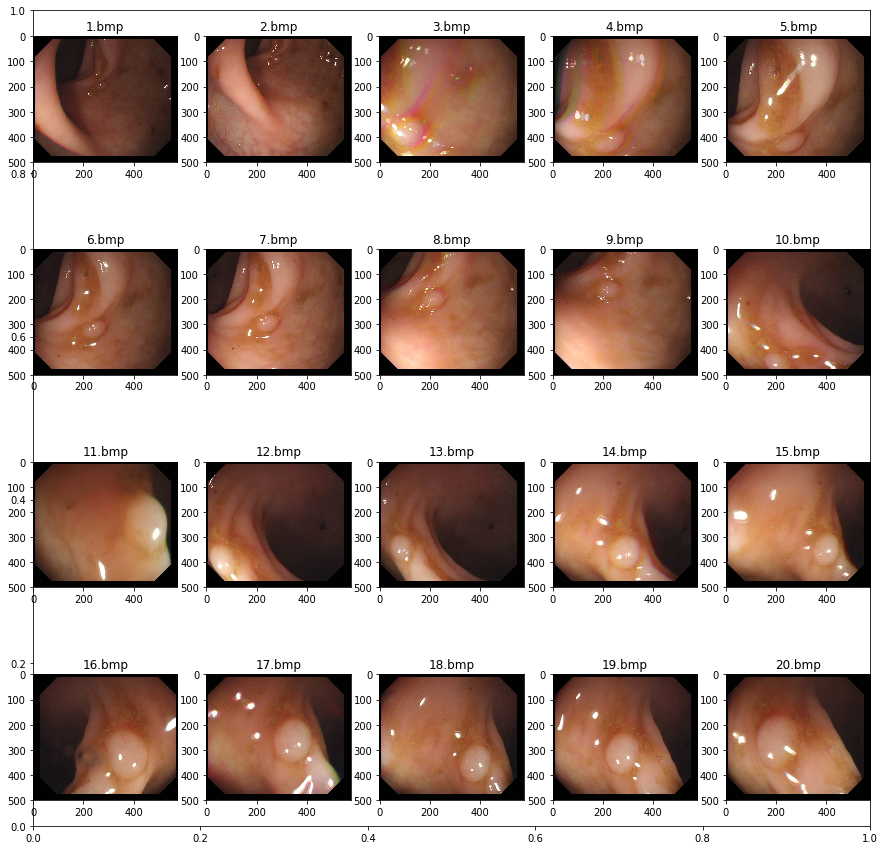

In [160]:
display_images(imgs[0:20, :, :, :], image_list[0:20])

In [161]:
loaded_images, image_list = loadImages(gt_folders[0], '.bmp', '*')
masks = []
for img in loaded_images:
    masks.append(np.asarray(img))

masks = np.array(masks)

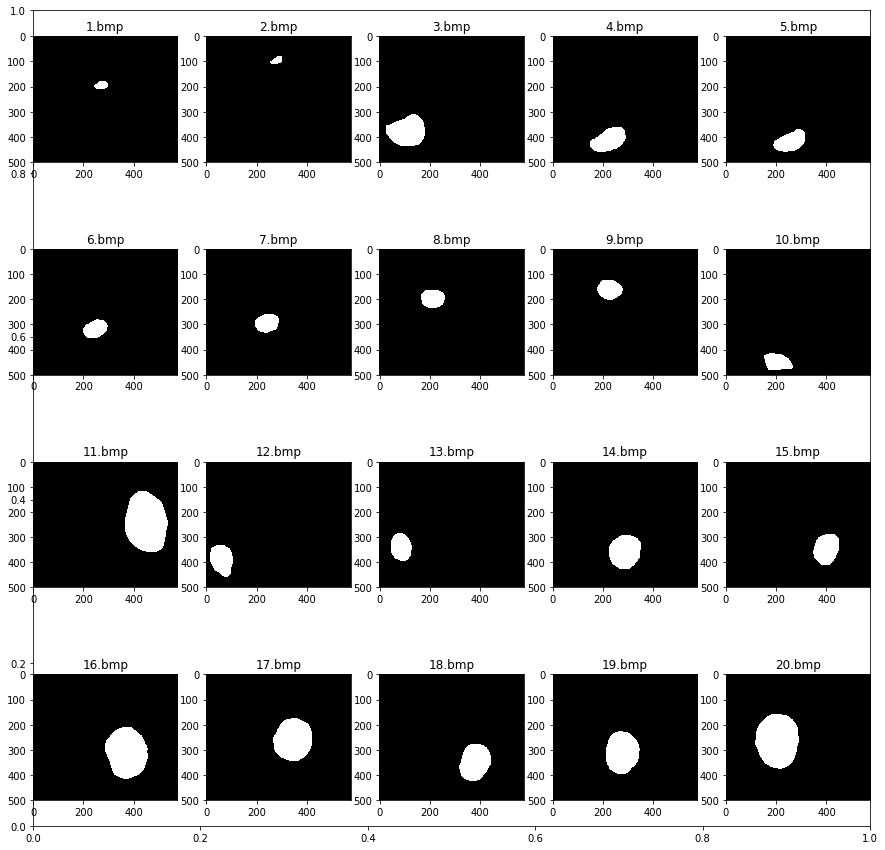

In [162]:
display_images(masks[0:20, :, :], image_list[0:20], cmap='gray')

# Collating all the data

In [56]:
data = []
file_list_all = []
for folder_list, extn_list, mask_name_list in zip(data_folders, data_folder_extns, filter_prefix):
    data_temp = []
    file_list_temp = []
    for folder, extn, mask_name in zip(folder_list, extn_list, mask_name_list):
        loaded_images, image_list = loadImages(folder, extn, desired_size=640, 
                                               pattern='*', filter_prefix=mask_name)
        data_temp.extend(loaded_images)
        file_list_temp.extend(image_list)
    data.append(np.array(data_temp))
    #     for img in loaded_images:
    #         imgs.append(np.asarray(img))
    file_list_all.append(image_list)

# imgs = np.array(imgs)

In [69]:
print(len(data))
for i in range(len(data)):
    print(data[i].shape)
print(len(file_list_all))

3
(300, 640, 640, 3)
(11954, 640, 640, 3)
(56, 640, 640, 3)
3


In [70]:
dataset_choice = np.random.randint(0, len(data))
print('Dataset chosen: {0}'.format(dataset_choice))
idxs = []
for x in range(20):
    idxs.append(random.randint(0,len(data[dataset_choice]))-1)
print(idxs)

Dataset chosen: 0
[115, 45, 142, 121, 16, 278, 194, 169, 150, 184, 162, 272, 259, 227, 118, 194, 77, 131, 93, 7]


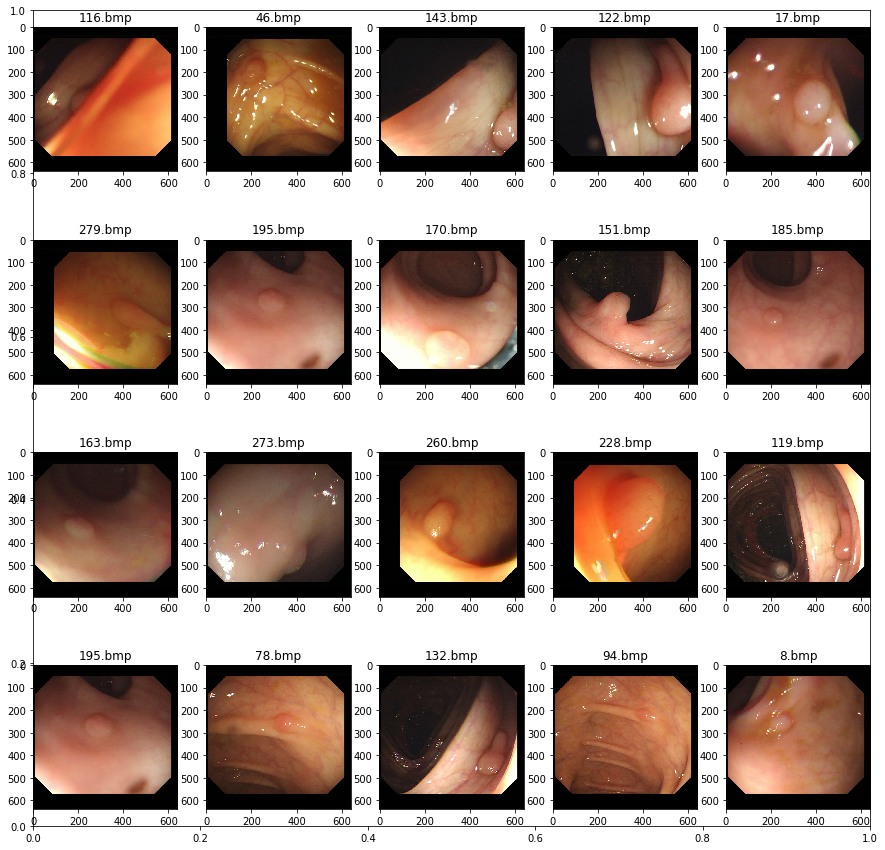

In [71]:
selected_imgs = [data[dataset_choice][i] for i in idxs]
selected_img_list = [file_list_all[dataset_choice][i] for i in idxs]
display_images(selected_imgs, selected_img_list)

In [74]:
mask_data = []
mask_file_list_all = []
for folder_list, extn_list, mask_name_list in zip(gt_folders, gtdata_folder_extns, filter_prefix):
    data_temp = []
    file_list_temp = []
    for folder, extn, mask_name in zip(folder_list, extn_list, mask_name_list):
        loaded_images, image_list = loadImages(folder, extn, desired_size=640, 
                                               pattern='*', filter_prefix=mask_name,
                                               include=True)
        data_temp.extend(loaded_images)
        file_list_temp.extend(image_list)
    mask_data.append(np.array(data_temp))
    #     for img in loaded_images:
    #         imgs.append(np.asarray(img))
    mask_file_list_all.append(image_list)

In [75]:
print(len(mask_data))
for i in range(len(mask_data)):
    print(mask_data[i].shape)
print(len(mask_file_list_all))

3
(300, 640, 640)
(11954, 640, 640)
(56, 640, 640)
3


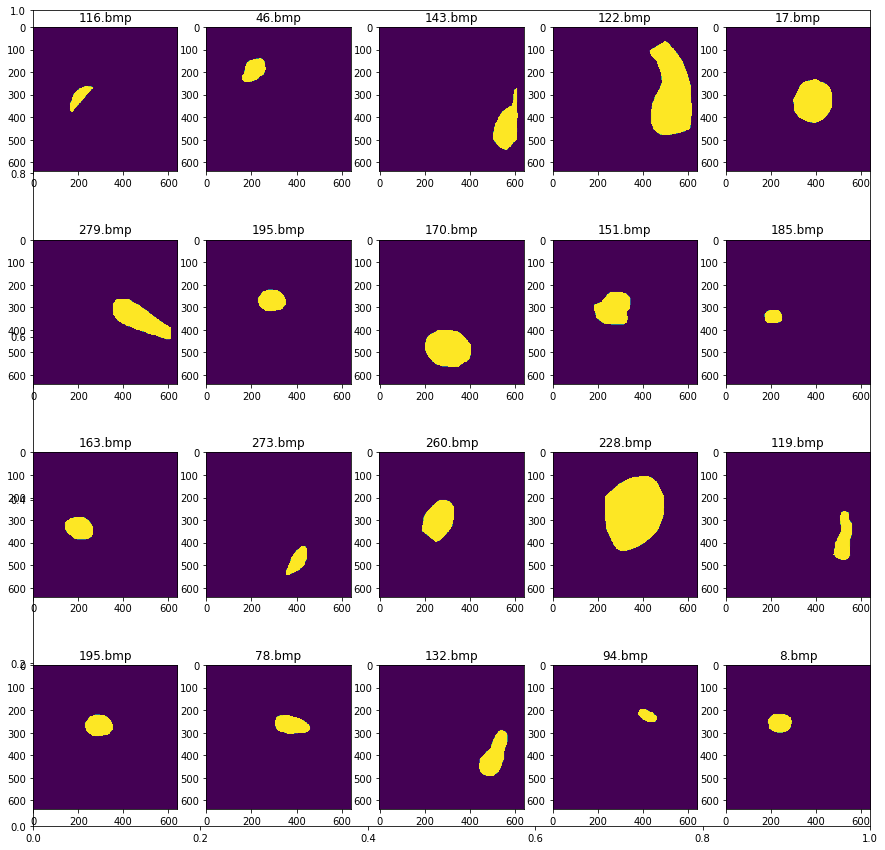

In [76]:
selected_imgs = [mask_data[dataset_choice][i] for i in idxs]
selected_img_list = [mask_file_list_all[dataset_choice][i] for i in idxs]
display_images(selected_imgs, selected_img_list)

In [47]:
# hdf5_file = tables.open_file(image_data, mode='w')
# image_data_storage = hdf5_file.create_array(hdf5_file.root, 'image_data', imgs)
# image_list_storage = hdf5_file.create_array(hdf5_file.root, 'image_list', image_list_all)
# hdf5_file.close()

# np.savez(saved_data, imgs, image_list_all) 
# np.savez(gt_saved_data, mask_imgs, mask_image_list_all)

for i in range(len(data)):
    np.save(image_data[i], data[i])
    np.save(gt_data[i], mask_data[i])

In [178]:
np.save(gt_data, mask_imgs)

In [179]:
del imgs, mask_imgs

In [184]:
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('masks', 86100128),
 ('image_list_all', 106968),
 ('mask_image_list_all', 106968),
 ('imgs', 98544),
 ('files', 4272),
 ('sorted_list', 2808),
 ('image_list', 616),
 ('loaded_images', 528),
 ('image_data', 270),
 ('saved_data', 270),
 ('idxs', 264),
 ('selected_img_list', 264),
 ('selected_imgs', 264),
 ('data_folder_extns', 224),
 ('data_folders', 224),
 ('filter_prefix', 224),
 ('gt_folders', 224),
 ('gtdata_folder_extns', 224),
 ('folder', 141),
 ('display_images', 136),
 ('loadImages', 136),
 ('natsorted', 136),
 ('gt_data', 125),
 ('gt_saved_data', 125),
 ('PImage', 80),
 ('hdf5_file', 80),
 ('np', 80),
 ('plt', 80),
 ('listdir', 72),
 ('ax', 56),
 ('fig', 56),
 ('img', 56),
 ('extn', 53),
 ('col', 28),
 ('cols', 28),
 ('count', 28),
 ('n_images', 28),
 ('row', 28),
 ('rows', 28),
 ('temp', 28),
 ('x', 28),
 ('mask_name', 16)]

In [183]:
imgs = np.load(image_data).tolist()

In [188]:
print(imgs[12000].shape)

(288, 384, 3)


In [11]:
imgs = np.load(image_data).tolist()
mask_imgs = np.load(gt_data).tolist()

print(imgs[0].shape)

image_data_small = 'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_data_small.npy'
gt_data_small = 'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/gt_data_small.npy'


imgs_small = []
mask_imgs_small = []
for i in range(20):
    imgs_small.append(np.asarray(imgs[i]))
    mask_imgs_small.append(np.asarray(mask_imgs[i]))
    
np.save(image_data_small, imgs_small)
np.save(gt_data_small, mask_imgs_small)

print(imgs_small[0].shape)

(500, 574, 3)
(500, 574, 3)


In [13]:
imgs_small = np.load(image_data_small)
mask_imgs_small = np.load(gt_data_small)

print(imgs_small[0].shape)

(500, 574, 3)


# All in one numpy array size=640x640

In [5]:
data = []
file_list_all = []
for folder_list, extn_list, mask_name_list in zip(data_folders, data_folder_extns, filter_prefix):
    data_temp = []
    file_list_temp = []
    for folder, extn, mask_name in zip(folder_list, extn_list, mask_name_list):
        loaded_images, image_list = loadImages(folder, extn, desired_size=640, 
                                               pattern='*', filter_prefix=mask_name)
        data.extend(loaded_images)
        file_list_all.extend(image_list)
    # data.append(np.array(data_temp))
    #     for img in loaded_images:
    #         imgs.append(np.asarray(img))
    # file_list_all.append(image_list)

data = np.array(data)

(12310, 640, 640, 3)


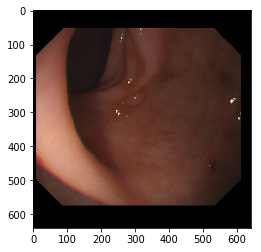

In [6]:
print(data.shape)
plt.imshow(data[0])

In [7]:
mask_data = []
mask_file_list_all = []
for folder_list, extn_list, mask_name_list in zip(gt_folders, gtdata_folder_extns, filter_prefix):
    data_temp = []
    file_list_temp = []
    for folder, extn, mask_name in zip(folder_list, extn_list, mask_name_list):
        loaded_images, image_list = loadImages(folder, extn, desired_size=640, 
                                               pattern='*', filter_prefix=mask_name,
                                               include=True)
        mask_data.extend(loaded_images)
        mask_file_list_all.extend(image_list)
    # mask_data.append(np.array(data_temp))
    #     for img in loaded_images:
    #         imgs.append(np.asarray(img))
    # mask_file_list_all.append(image_list)
mask_data = np.array(mask_data)
print(mask_data.shape)

(12310, 640, 640)


(12310, 640, 640, 3)


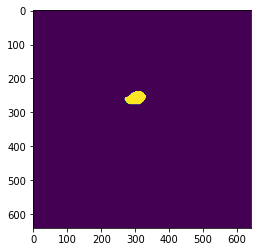

In [8]:
print(data.shape)
plt.imshow(mask_data[0])

In [9]:
np.save(image_data_all[0], data)
np.save(gt_data_all[0], mask_data)

In [10]:
print(len(file_list_all), len(mask_file_list_all))

12310 12310


In [13]:
with open(image_file_list_all, 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(file_list_all)
    
with open(gt_file_list_all, 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(mask_file_list_all)

In [14]:
all_file_list = list(zip(file_list_all, mask_file_list_all))

In [16]:
len(all_file_list[0])

2

In [17]:
image_gt_file_list_all = 'C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/image_gt_data_file_list_all_640x640.csv'

with open(image_gt_file_list_all, 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(all_file_list)

In [18]:
import pandas as pd

In [30]:
df = pd.read_csv(image_gt_file_list_all, header=None)

In [31]:
tmp1 = df.iloc[:,0].values
tmp2 = df.iloc[:,1].values

In [32]:
tmp1.shape

(12310,)

In [34]:
print(all_file_list[0][1])

C:/dev/data/Endoviz2018/GIANA/polyp_detection_segmentation/train/cvc300_TRAIN/gtpolyp\1.bmp
